In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e9/sample_submission.csv
/kaggle/input/playground-series-s3e9/train.csv
/kaggle/input/playground-series-s3e9/test.csv


In [2]:
data=pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')

In [3]:
data

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [4]:
test_data

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


In [5]:
data.drop('id',axis=1,inplace=True)
data.shape

(5407, 9)

In [6]:
#test_data.drop('id',axis=1,inplace=True)
#test_data.shape

In [7]:
data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [9]:
for i in data:
    print(data[i].nunique())
    print(data[i].value_counts())
    

314
349.0    215
331.0    149
500.0    138
310.0    101
236.0    101
        ... 
154.4      1
155.1      1
151.6      1
331.4      1
185.7      1
Name: CementComponent, Length: 314, dtype: int64
224
0.0      3166
189.0     101
106.3      89
209.4      76
145.0      70
         ... 
119.0       1
239.6       1
17.2        1
117.5       1
94.0        1
Name: BlastFurnaceSlag, Length: 224, dtype: int64
177
0.0      3927
118.3      96
94.0       73
79.0       57
24.5       56
         ... 
160.9       1
200.1       1
175.2       1
91.7        1
115.0       1
Name: FlyAshComponent, Length: 177, dtype: int64
215
192.0    1196
185.7     391
228.0     254
186.0     233
203.5     171
         ... 
191.4       1
194.7       1
153.6       1
173.1       1
178.3       1
Name: WaterComponent, Length: 215, dtype: int64
112
0.0     3143
11.6     161
8.0      104
7.0      100
16.5      76
        ... 
8.8        1
10.6       1
1.8        1
15.2       1
14.8       1
Name: SuperplasticizerComponent, Len

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

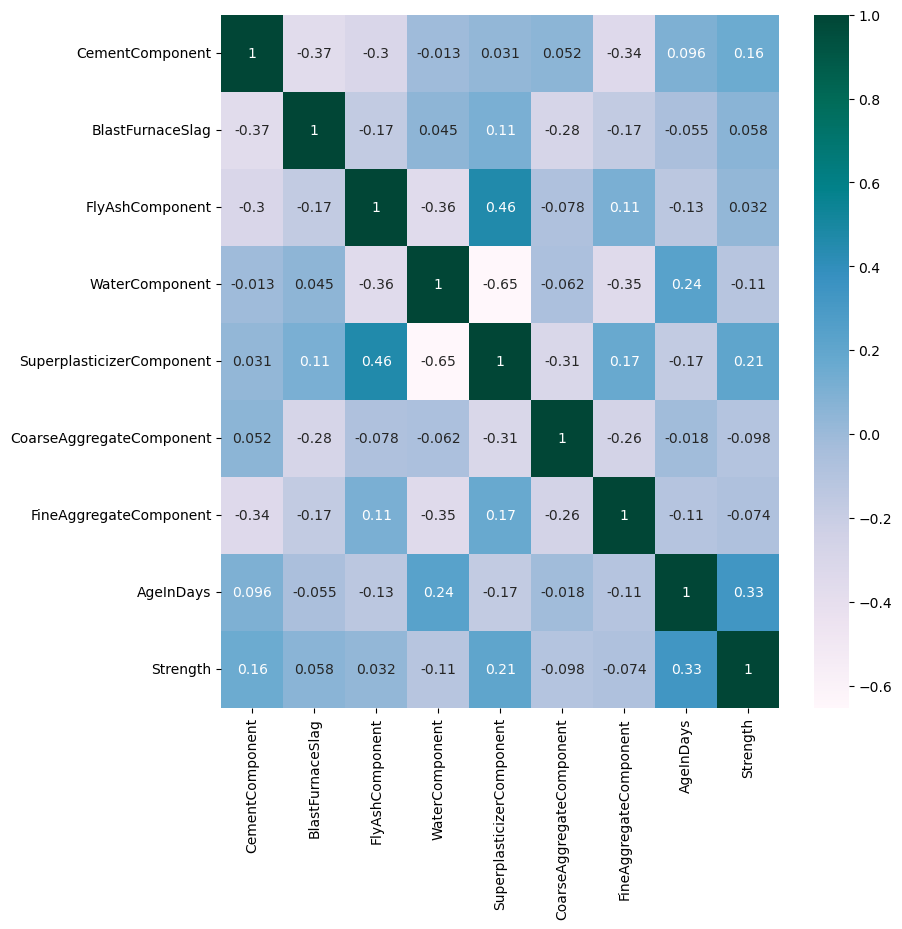

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True, cmap='PuBuGn')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


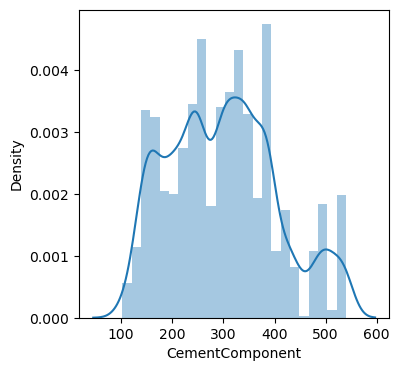

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


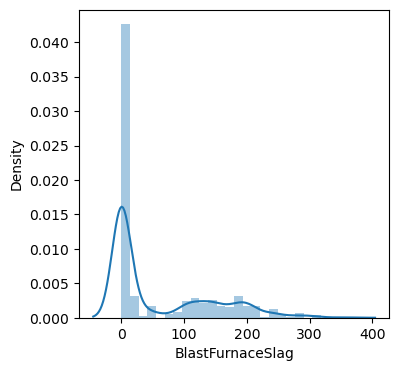

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


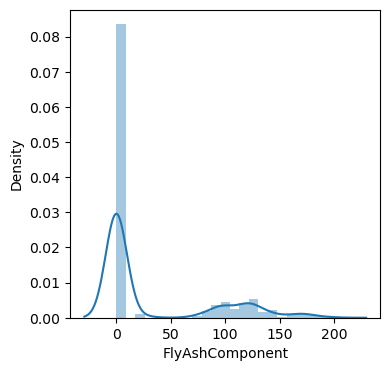

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


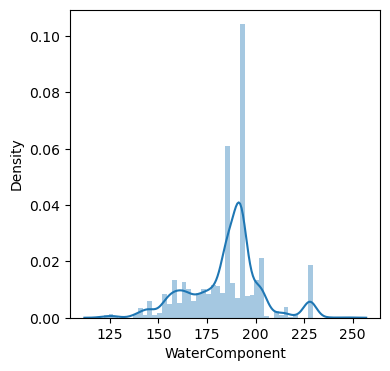

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


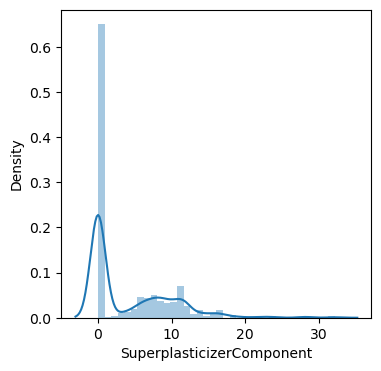

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


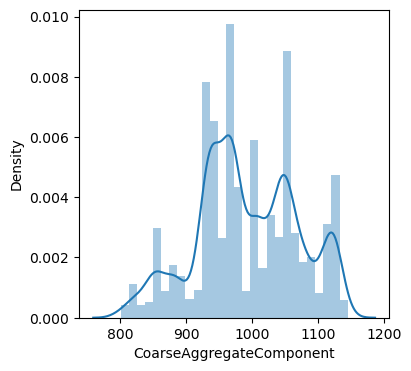

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


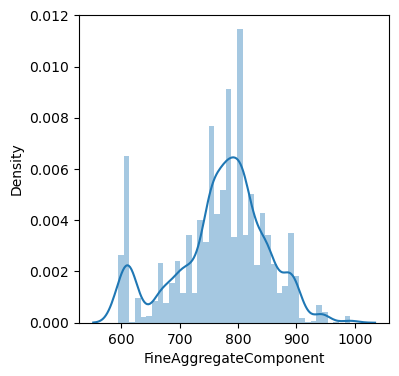

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


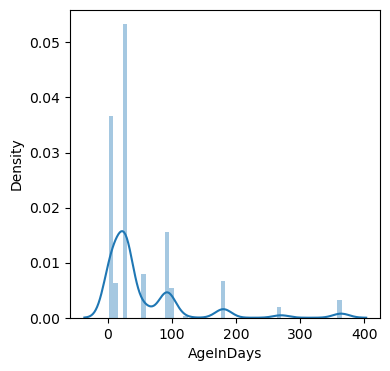

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


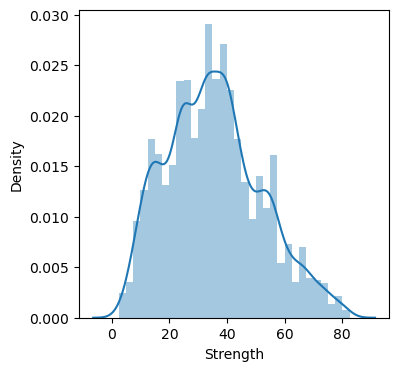

In [12]:
for a in data.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(data[a])
    plt.show()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(data)

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit_transform(data)

array([[0.96575342, 0.        , 0.        , ..., 0.04766683, 0.00549451,
        0.10028653],
       [0.09360731, 0.47022816, 0.71464268, ..., 0.12293026, 0.07417582,
        0.26398405],
       [0.42694064, 0.37479132, 0.        , ..., 0.50501756, 0.07417582,
        0.43141896],
       ...,
       [0.44246575, 0.        , 0.        , ..., 0.41470146, 0.07417582,
        0.46057057],
       [0.62557078, 0.25987757, 0.        , ..., 0.17285499, 0.07417582,
        0.46443254],
       [0.20251142, 0.        , 0.62568716, ..., 0.44179629, 0.1510989 ,
        0.75756821]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


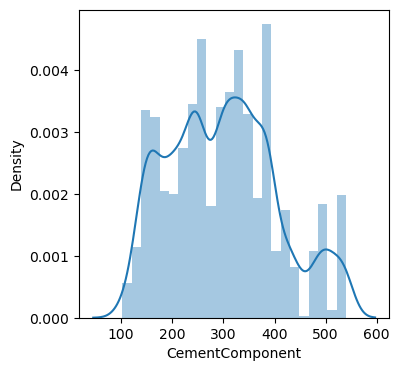

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


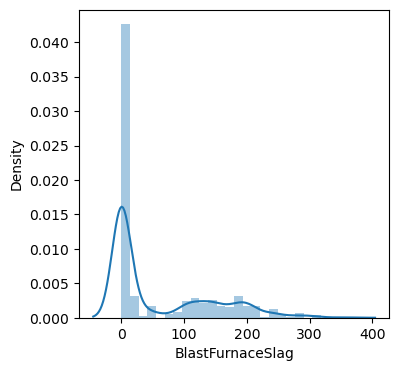

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


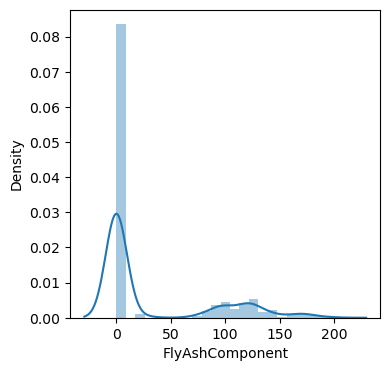

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


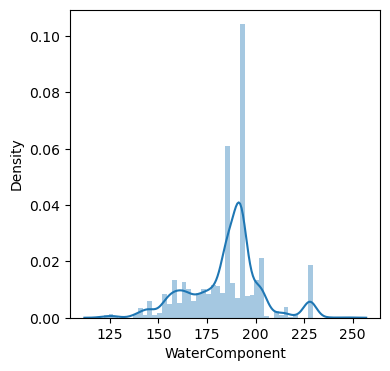

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


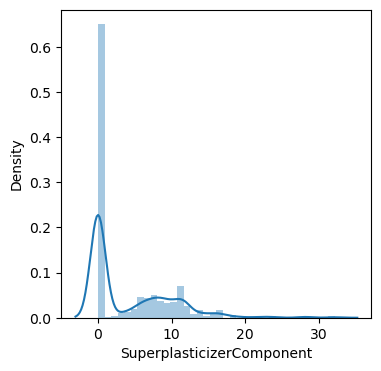

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


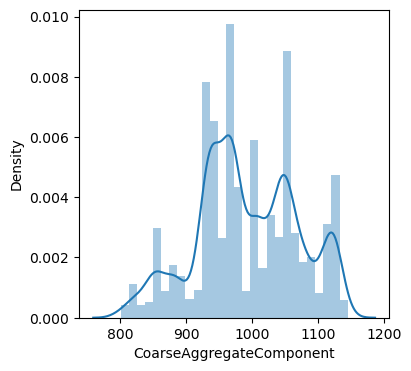

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


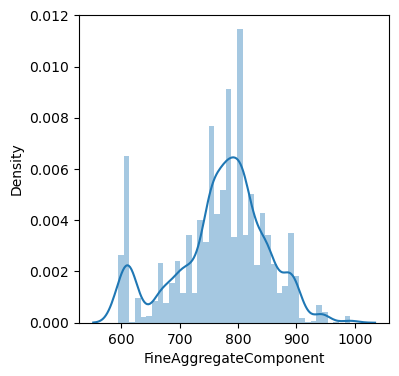

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


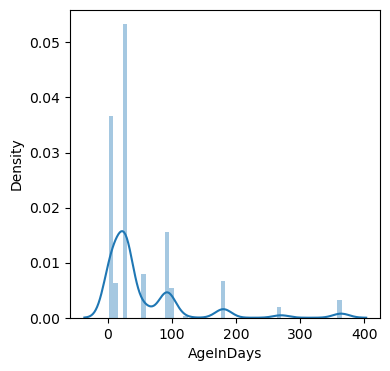

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


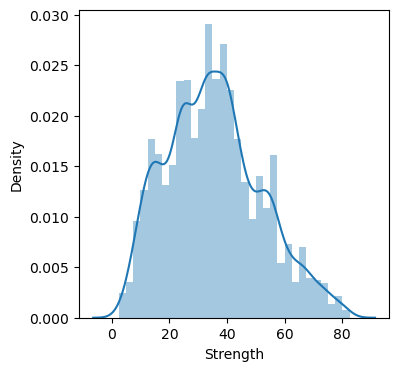

In [14]:
for a in data.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(data[a])
    plt.show()

In [15]:
dataCols = list(data.columns[:7])
data['sum'] = data[dataCols].sum(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='sum', ylabel='Density'>

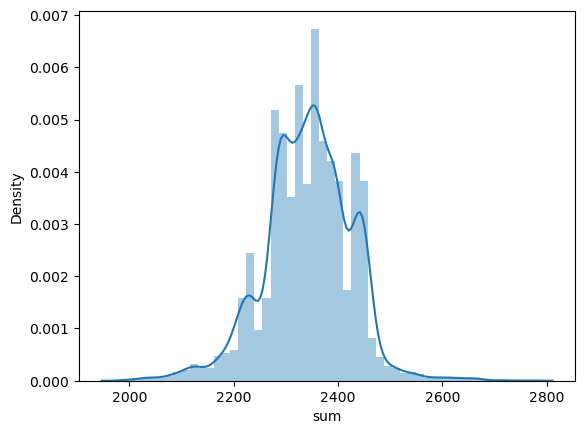

In [16]:
sns.distplot(data['sum'])

In [17]:
from sklearn.model_selection import train_test_split

x = list(data.columns[:8])
x.append('sum')
x = data[x]
y= data['Strength']
xTrain, xTest,yTrain,yTest = train_test_split(x,y, test_size=.1, random_state=0)

In [18]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

XGmodel = xgb.XGBRegressor()
params = {"max_depth":[3],
          "n_estimators": [200, 400],
          "learning_rate": [.0255, .0275, .0265]}

search = GridSearchCV(XGmodel, params, cv=6, verbose=2, scoring='neg_root_mean_squared_error').fit(xTrain, yTrain)

search.best_params_

Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.0255, max_depth=3, n_estimators=400; total time=   1.3s
[CV] END learning_rate=0.0255, max_depth=3, n_est

{'learning_rate': 0.0255, 'max_depth': 3, 'n_estimators': 400}

In [19]:
XGmodel = xgb.XGBRegressor(learning_rate = .0275, n_estimators = 400, max_depth = 3).fit(xTrain,yTrain)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

preds = XGmodel.predict(xTest)

RMSE = np.sqrt(mean_squared_error(yTest,preds))

RMSE

11.598276316856637

In [21]:
test_data

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,5407,166.1,75.4,163.8,173.8,4.6,1007.2,746.6,56
1,5408,304.0,0.0,0.0,190.0,0.0,998.0,801.0,7
2,5409,225.0,0.0,0.0,185.0,0.0,1113.0,833.0,28
3,5410,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,100
4,5411,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28
...,...,...,...,...,...,...,...,...,...
3600,9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28
3601,9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28
3602,9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28
3603,9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3


In [22]:
test = XGmodel.predict(test_data)
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e9/sample_submission.csv")
sample_submission["Strength"] = test
sample_submission.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv")

,id,Strength
0,5407,53.321484
1,5408,61.298542
2,5409,60.569424
3,5410,60.378300
4,5411,57.584904
...,...,...
3600,9007,62.158184
3601,9008,60.835297
3602,9009,57.675236
3603,9010,65.655400
